# Задание на практику
1. Найти данные для кластеризации. Данные в группе не должны повторяться! Внимание, если признаки в данных имеют очень сильно
разные масштабы, то необходимо данные предварительно нормализовать.
2. Провести кластеризацию данных с помощью алгоритма k-means. Использовать «правило локтя» и коэффициент силуэта для поиска
оптимального количества кластеров.
3. Провести кластеризацию данных с помощью алгоритма иерархической кластеризации.
4. Провести кластеризацию данных с помощью алгоритма DBSCAN.
5. Сравнить скорость работы алгоритмов. Результаты изобразить в виде таблицы.
6. Визуализировать кластеризованные данные с помощью t-SNE или UMAP если данные многомерные. Если данные трехмерные, то можно использовать трехмерный точечный график.
7. Оформить отчет о проделанной работе. Сделать выводы.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
data, target = fetch_openml('S1', as_frame=True, return_X_y=True)

In [25]:
target.value_counts()

13.0    350
14.0    350
15.0    350
12.0    349
11.0    347
10.0    342
9.0     341
8.0     338
7.0     334
6.0     326
5.0     325
4.0     318
2.0     316
3.0     314
1.0     300
Name: label, dtype: int64

In [3]:
data

,d1,d2
0,664159.0,550946.0
1,665845.0,557965.0
2,597173.0,575538.0
3,618600.0,551446.0
4,635690.0,608046.0
...,...,...
4995,665426.0,853940.0
4996,691827.0,863963.0
4997,650661.0,861267.0
4998,599647.0,858702.0


Проверим данные

In [5]:
data.isna().sum()

d1    0
d2    0
dtype: int64

Почистим данные

И нормализуем их

In [7]:
data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)

Обучим `Kmeans` и выберем количество кластеров с помощью метода локтя и коэффициента силуэта

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, OPTICS

In [9]:
from sklearn.metrics import silhouette_score

distortions = []
inertias = []
silhouette = []
K = range(2, 30)

In [10]:
%%time
for k in K:
    kmeanModel = make_pipeline(StandardScaler(),
                               KMeans(n_clusters=k, random_state=13))
    kmeanModel.fit(data)
    inertias.append(kmeanModel[-1].inertia_)
    silhouette.append(silhouette_score(data, kmeanModel[-1].labels_))

CPU times: total: 3min 19s
Wall time: 19.2 s


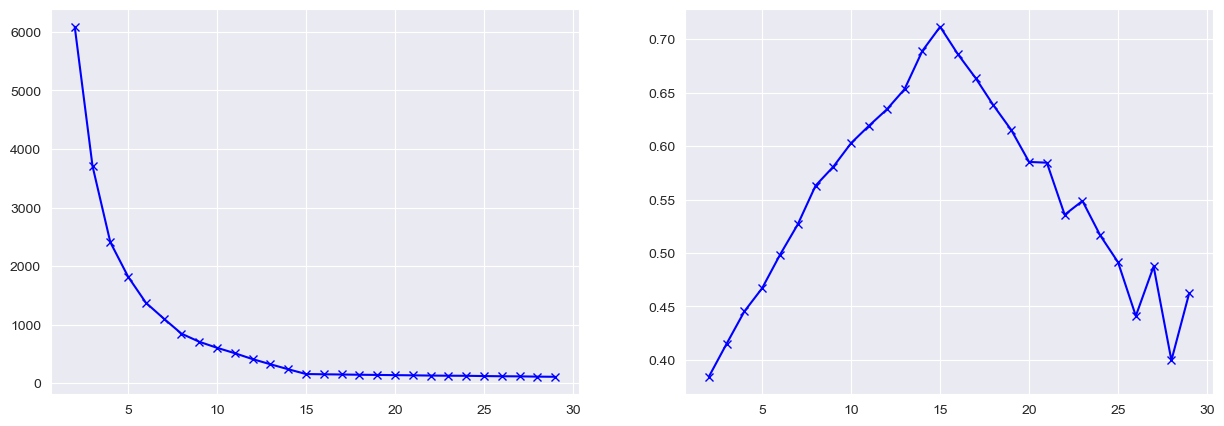

In [11]:
plt.figure(figsize=(15, 5))
for i, a in enumerate([inertias, silhouette]):
    plt.subplot(1, 2, i + 1)
    plt.plot(K, a, 'bx-')
plt.show()

Теперь обучим все модели и визуализируем датасет

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE

In [13]:
def train_model(model, train):
    pipe = make_pipeline(StandardScaler(), model).fit(train)
    return pipe[-1]

def visual(X, labels):
    plt.figure(figsize=(10,10))
    tsne = TSNE(n_components=2, perplexity=30, random_state=123)
    features = tsne.fit_transform(X)
    sns.scatterplot(features[:, 0], features[:, 1], hue=labels, palette='bright')\
        .set(title=f'perplexity={30}')
    plt.show()

In [41]:
models = [KMeans(n_clusters=15),AgglomerativeClustering(n_clusters=15, compute_distances=True), OPTICS(min_samples=150, max_eps=300)]
for i, model in enumerate(models):
    print(model.__class__.__name__, end=': ')
    %time models[i] = train_model(model, data.sample(frac=1))

KMeans: CPU times: total: 4.12 s
Wall time: 319 ms
AgglomerativeClustering: CPU times: total: 2.3 s
Wall time: 523 ms
OPTICS: CPU times: total: 2.94 s
Wall time: 2.94 s


C:\Users\Alexey\anaconda3\envs\bigdata1\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Alexey\anaconda3\envs\bigdata1\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Alexey\anaconda3\envs\bigdata1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


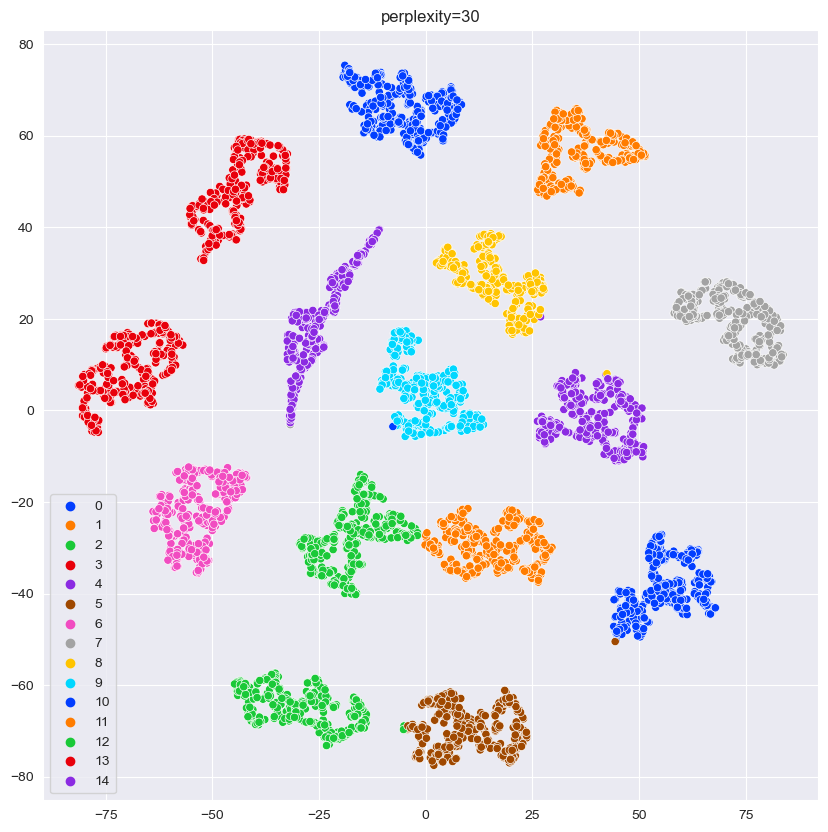

C:\Users\Alexey\anaconda3\envs\bigdata1\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Alexey\anaconda3\envs\bigdata1\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Alexey\anaconda3\envs\bigdata1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


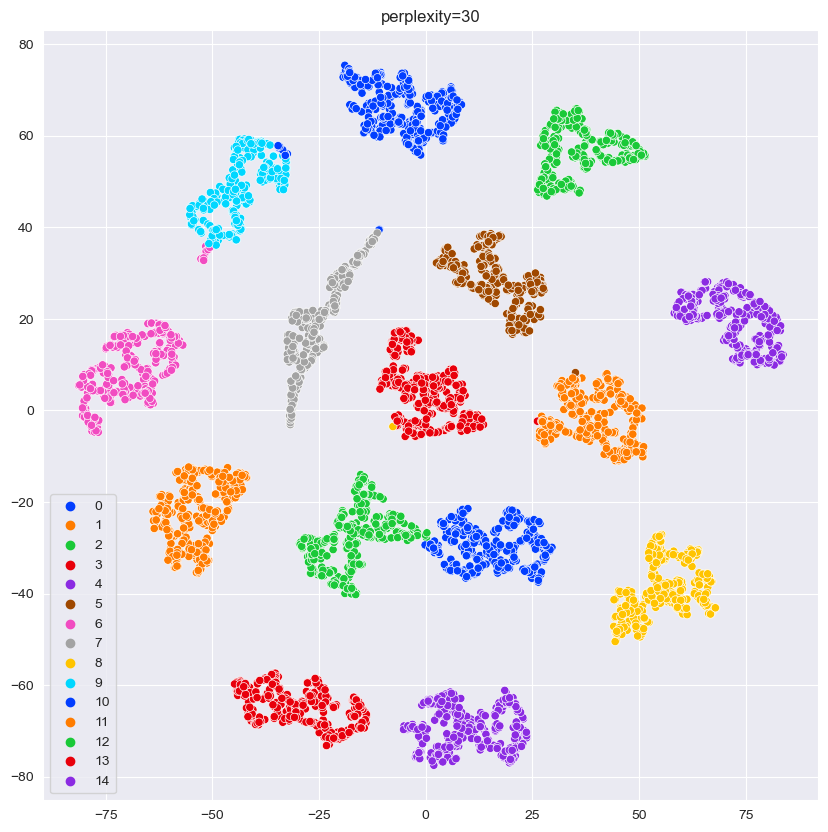

C:\Users\Alexey\anaconda3\envs\bigdata1\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Alexey\anaconda3\envs\bigdata1\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Alexey\anaconda3\envs\bigdata1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


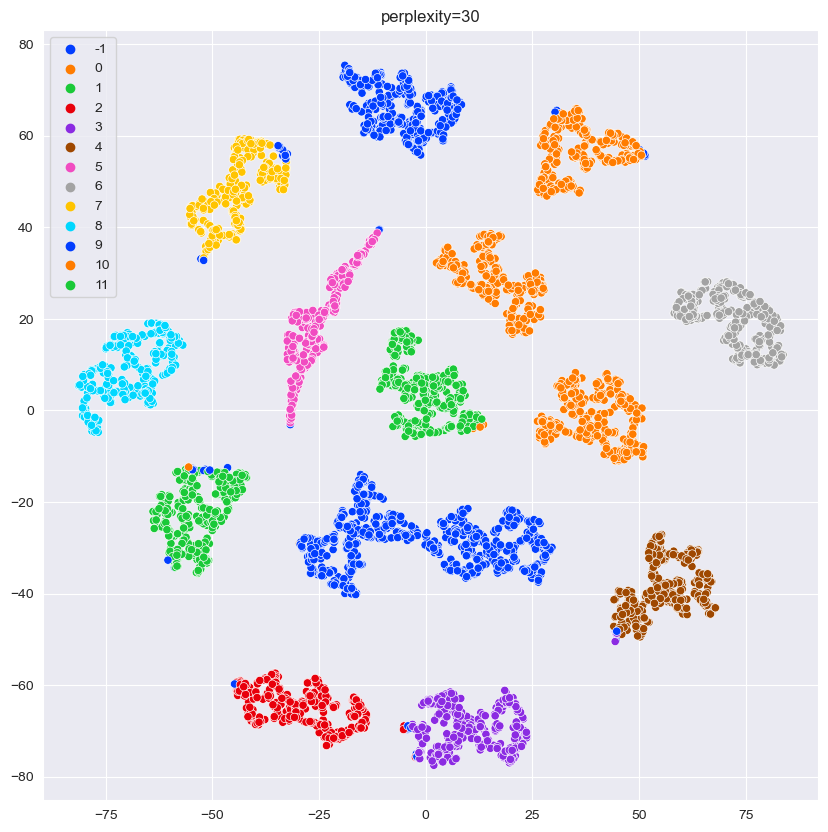

In [43]:
X = data.sample(frac=1)
for i, model in enumerate(models):
    visual(X, model.fit_predict(X))